# Setup

In [21]:
using Pkg
Pkg.activate("..")
using TOML
using RCall
const src = joinpath("..","src")
include(joinpath(src,"count_lengths.jl"))

count_lengths (generic function with 3 methods)

In [4]:
paramfile = joinpath("..","data","count_lengths","run_2018-09-12",
                     "individual_extremes_params.feather")
params = getparams(paramfile) do i,row
  abs(row[:t_c_m] - 32) < 1 &&
  abs(row[:t_c_a] - 5) < 1 &&
  row[:Δf] == 12
end

params[:t_W_m_σ_t] = 7.0
params[:t_W_m_σ_ϕ] = 7.0
params[:t_W_m_c] = 4.0

settings = TOML.parsefile(joinpath(src,"settings.toml"))

Dict{AbstractString,Any} with 7 entries:
  "percept_lengths" => Dict{AbstractString,Any}("window_ms"=>500,"bandwidth_thr…
  "freqs"           => Dict{AbstractString,Any}("bistable"=>Dict{AbstractString…
  "rates"           => Dict{AbstractString,Any}("rates_Hz"=>[2, 4, 8, 16, 32],"…
  "config"          => Dict{AbstractString,Any}()
  "scales"          => Dict{AbstractString,Any}("bistable"=>Dict{AbstractString…
  "track"           => Dict{AbstractString,Any}("bistable"=>Dict{AbstractString…
  "nmf"             => Dict{AbstractString,Any}("skipframes"=>0,"tol"=>0.001,"w…

# Without Normalization

In [5]:
settings["track"]["analyze"]["max_sources"] = 2
settings["track"]["analyze"]["normalize"] = false

result = []
for d in [1,3,6,12]
  params[:Δf] = d
  push!(result,bistable_model(15,params,settings,progressbar=false,
                              intermediate_results=true))
end

┌ Info: 2.78% of frames failed to fully converge to a solution.
└ @ AuditoryBistabilityLE /Users/davidlittle/googledrive/juliadev/AuditoryBistabilityLE/src/nmf.jl:44
┌ Info: 1.39% of frames failed to fully converge to a solution.
└ @ AuditoryBistabilityLE /Users/davidlittle/googledrive/juliadev/AuditoryBistabilityLE/src/nmf.jl:44


In [6]:
R"options(rcalljl_options=list(width=800,height=400))"

RObject{VecSxp}
$rcalljl_options
$rcalljl_options$height
[1] 360

$rcalljl_options$width
[1] 432




## Delta f = 1st

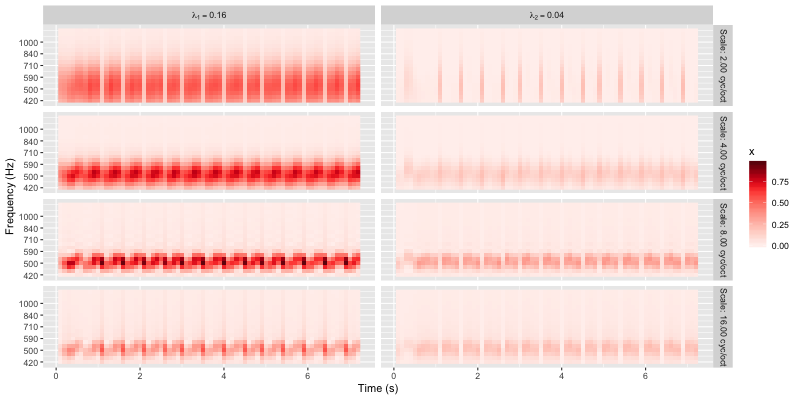

RObject{VecSxp}


In [7]:
rplot(result[1].cohere)

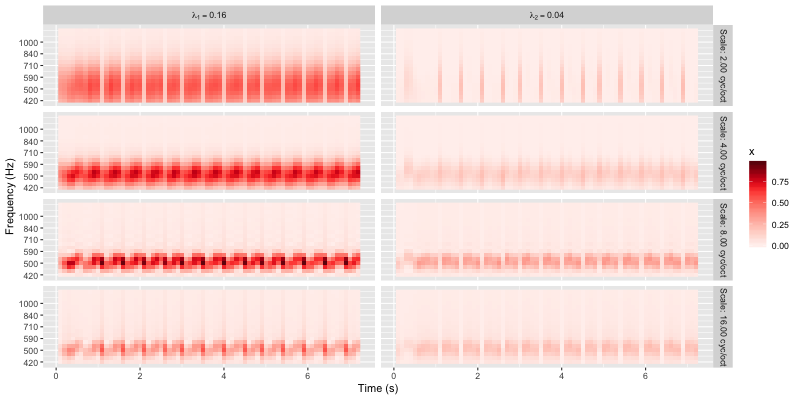

RObject{VecSxp}


In [8]:
rplot(result[1].sources.tracks[1])

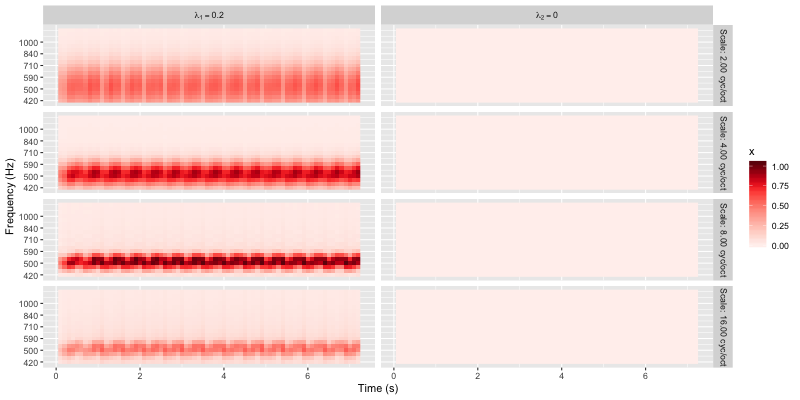

RObject{VecSxp}


In [9]:
rplot(result[1].sources.tracks[3])

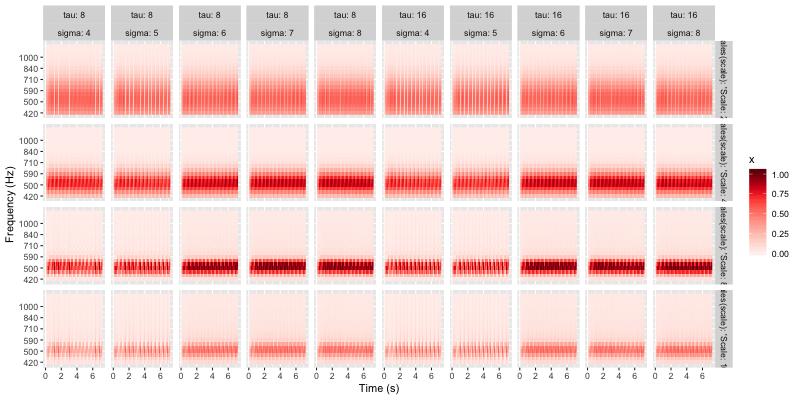

RObject{VecSxp}


In [10]:
rplot(result[1].sources.tracks)

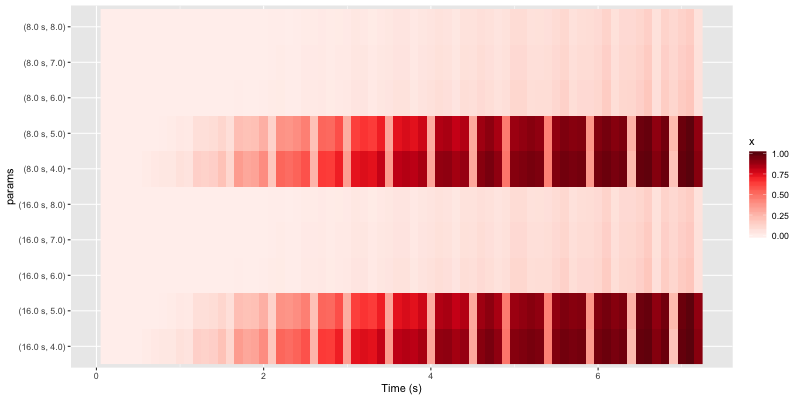

RObject{VecSxp}


In [11]:
rplot(result[1].sources.inweights)

## Delta f = 3st

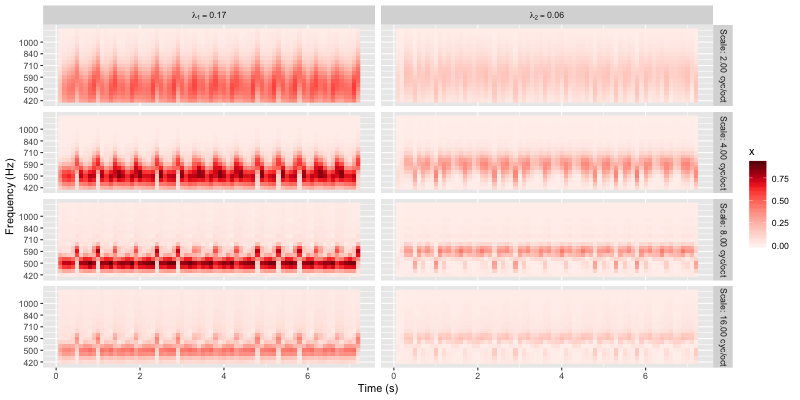

RObject{VecSxp}


In [12]:
rplot(result[2].cohere)

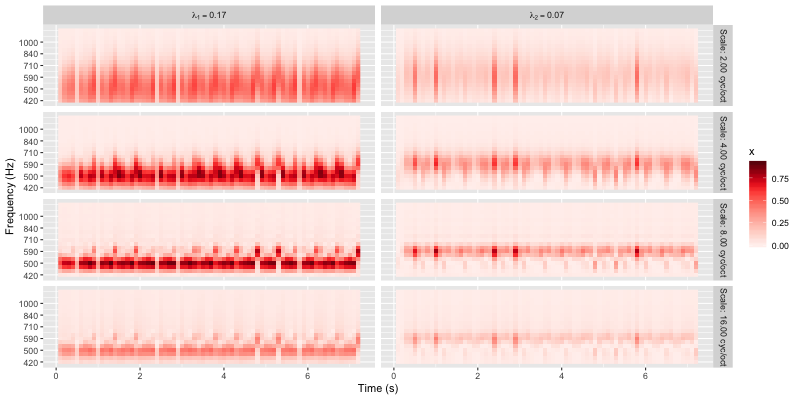

RObject{VecSxp}


In [13]:
rplot(result[2].sources.tracks[1])

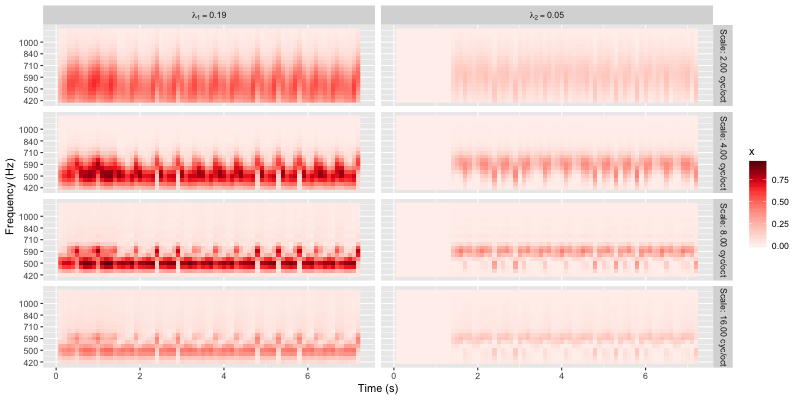

RObject{VecSxp}


In [14]:
rplot(result[2].sources.tracks[3])

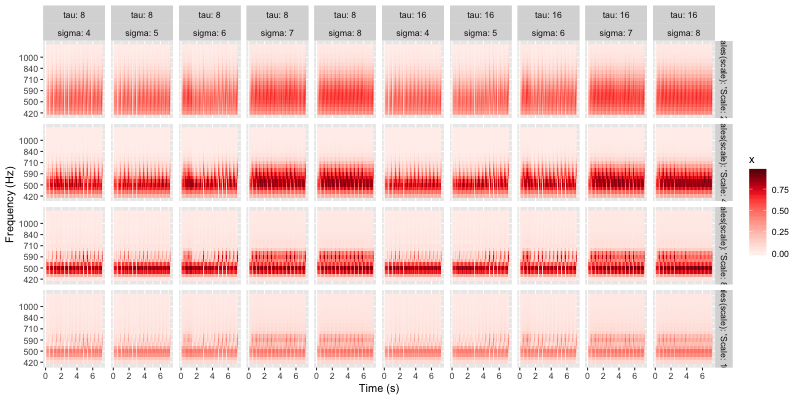

RObject{VecSxp}


In [15]:
rplot(result[2].sources.tracks)

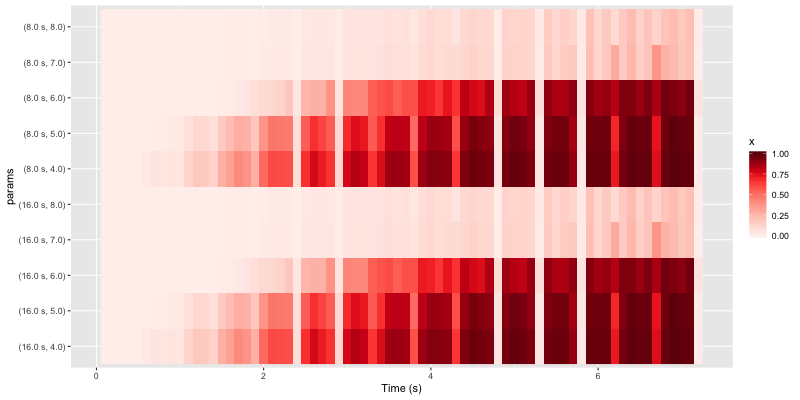

RObject{VecSxp}


In [16]:
rplot(result[2].sources.inweights)

## Delta f = 6st

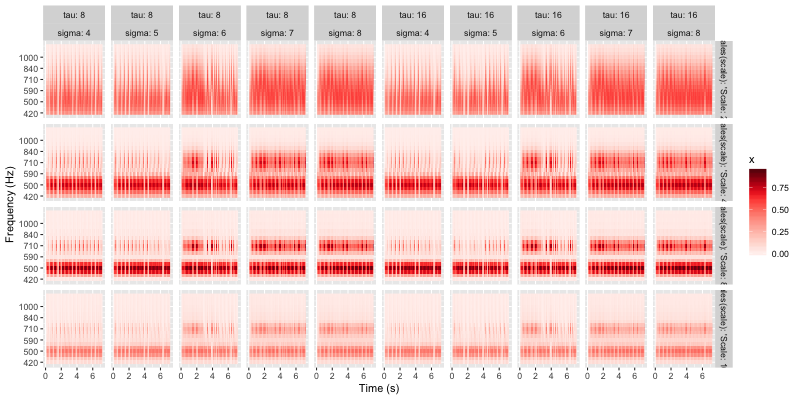

RObject{VecSxp}


In [17]:
rplot(result[3].sources.tracks)

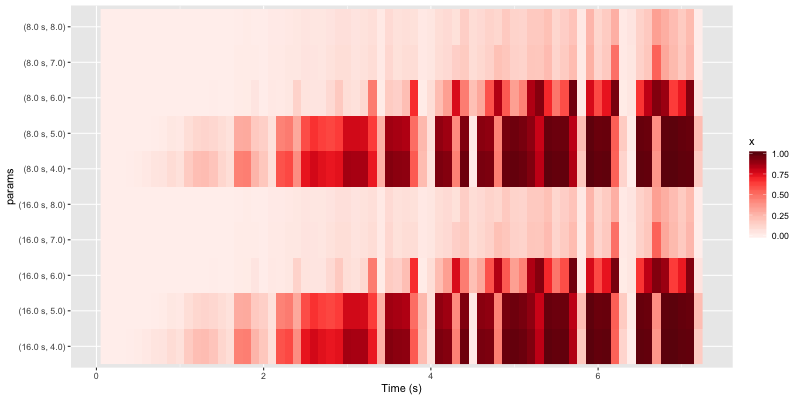

RObject{VecSxp}


In [18]:
rplot(result[3].sources.inweights)

## Delta f = 12st

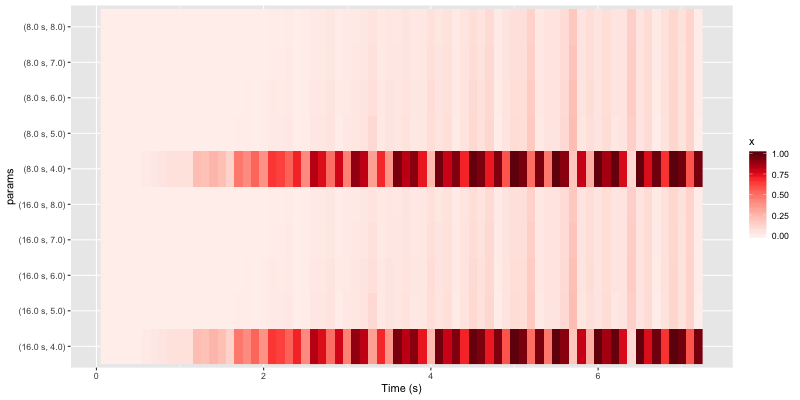

RObject{VecSxp}


In [19]:
rplot(result[4].sources.inweights)

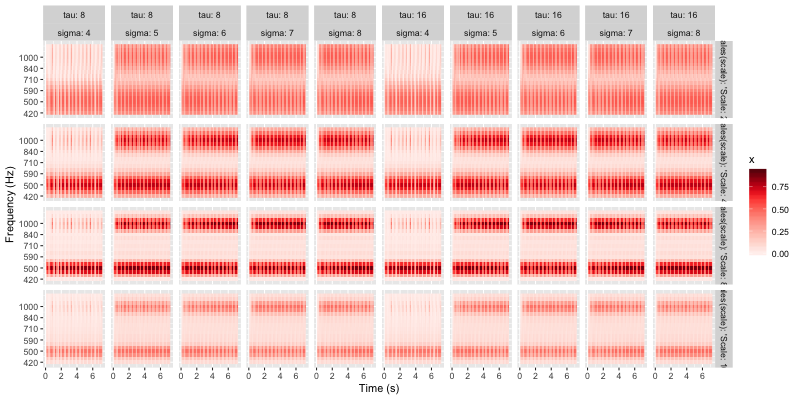

RObject{VecSxp}


In [20]:
rplot(result[4].sources.tracks)

# Normalization approach \#1

In [22]:
settings["track"]["analyze"]["max_sources"] = 2
settings["track"]["analyze"]["normalize"] = true
settings["track"]["analyze"]["min_norm"] = 0.2


result = []
for d in [1,3,6,12]
  params[:Δf] = d
  push!(result,bistable_model(15,params,settings,progressbar=false,
                              intermediate_results=true))
end

┌ Info: 2.78% of frames failed to fully converge to a solution.
└ @ AuditoryBistabilityLE /Users/davidlittle/googledrive/juliadev/AuditoryBistabilityLE/src/nmf.jl:44
┌ Info: 1.39% of frames failed to fully converge to a solution.
└ @ AuditoryBistabilityLE /Users/davidlittle/googledrive/juliadev/AuditoryBistabilityLE/src/nmf.jl:44


In [14]:
R"options(rcalljl_options=list(width=800,height=400))"

RObject{VecSxp}
$rcalljl_options
$rcalljl_options$width
[1] 800

$rcalljl_options$height
[1] 400




## Delta f = 1st

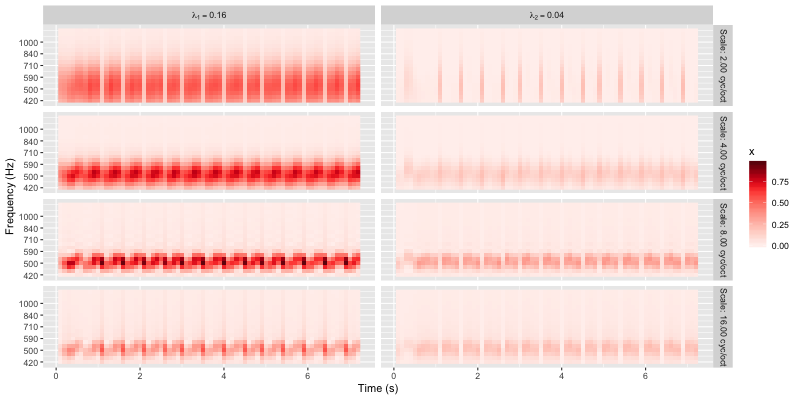

RObject{VecSxp}


In [23]:
rplot(result[1].cohere)

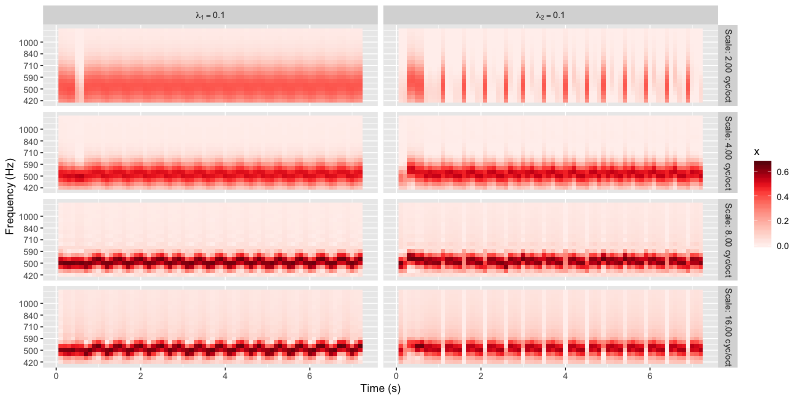

RObject{VecSxp}


In [24]:
rplot(result[1].sources.tracks[1])

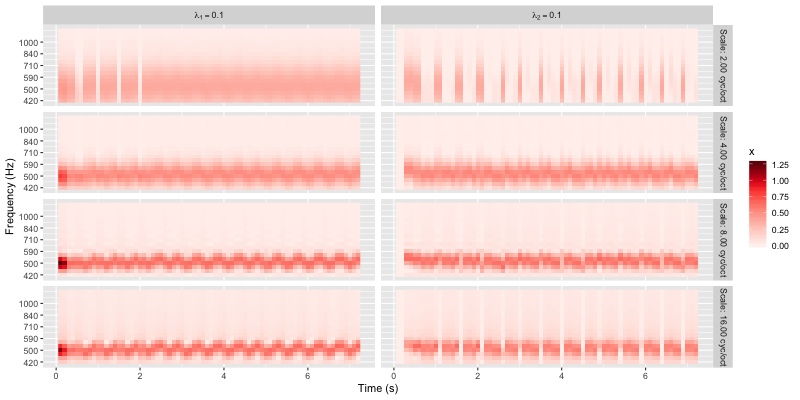

RObject{VecSxp}


In [25]:
rplot(result[1].sources.tracks[3])

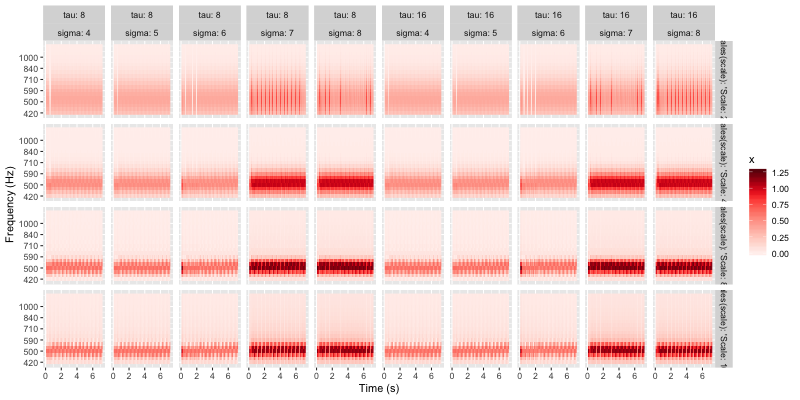

RObject{VecSxp}


In [26]:
rplot(result[1].sources.tracks)

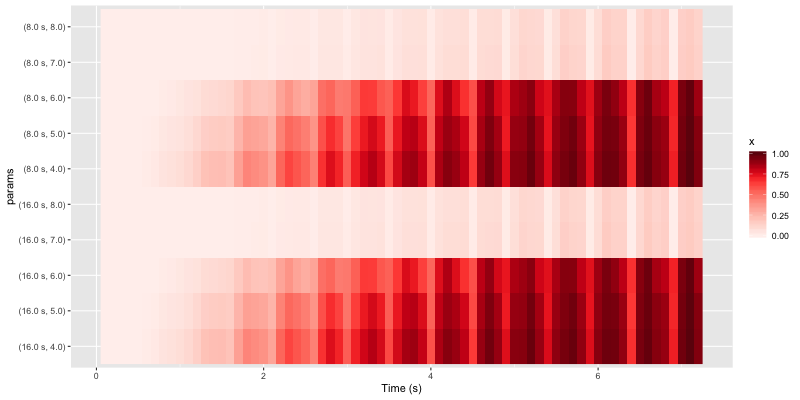

RObject{VecSxp}


In [27]:
rplot(result[1].sources.inweights)

## Delta f = 3st

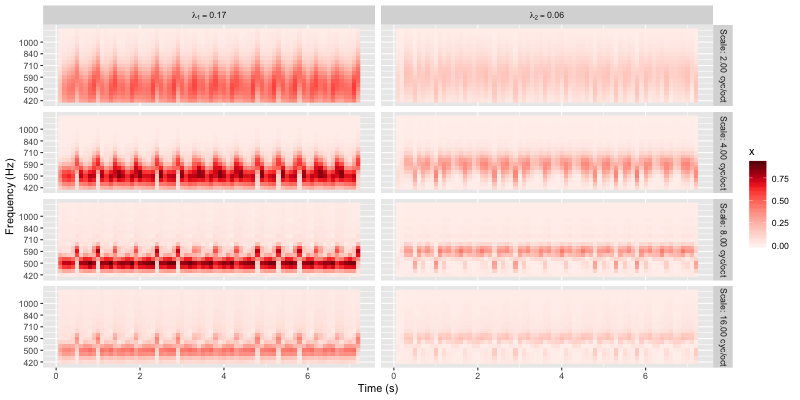

RObject{VecSxp}


In [28]:
rplot(result[2].cohere)

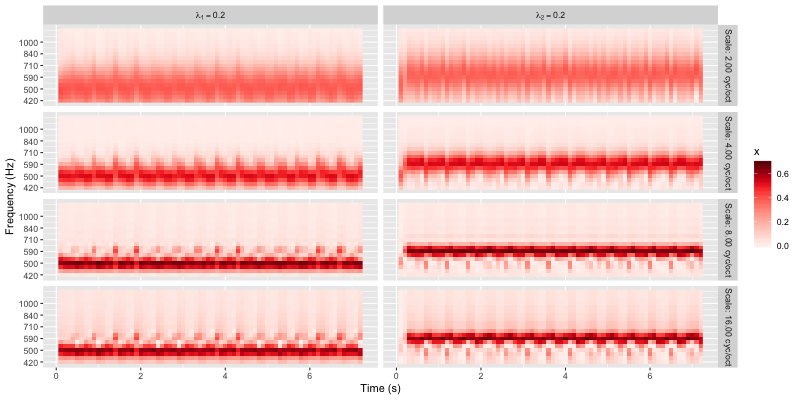

RObject{VecSxp}


In [29]:
rplot(result[2].sources.tracks[1])

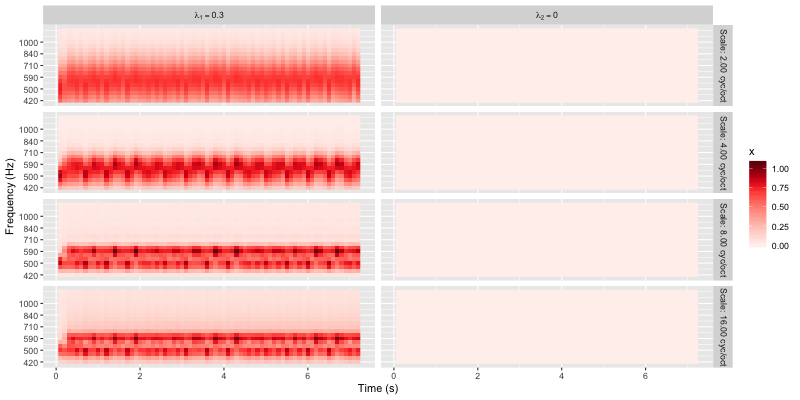

RObject{VecSxp}


In [30]:
rplot(result[2].sources.tracks[3])

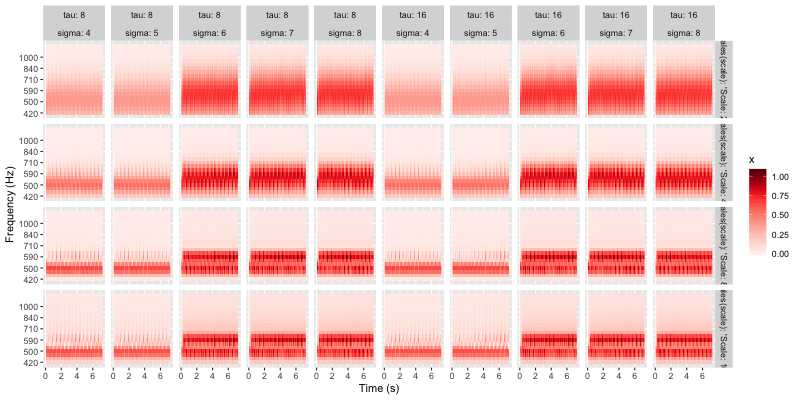

RObject{VecSxp}


In [31]:
rplot(result[2].sources.tracks)

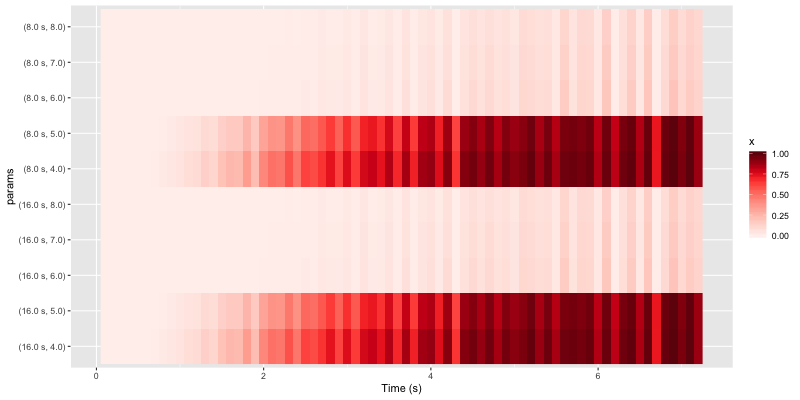

RObject{VecSxp}


In [32]:
rplot(result[2].sources.inweights)

## Delta f = 6st

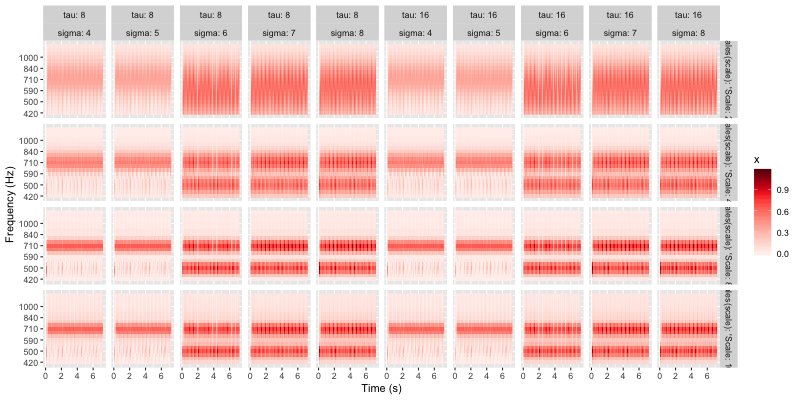

RObject{VecSxp}


In [33]:
rplot(result[3].sources.tracks)

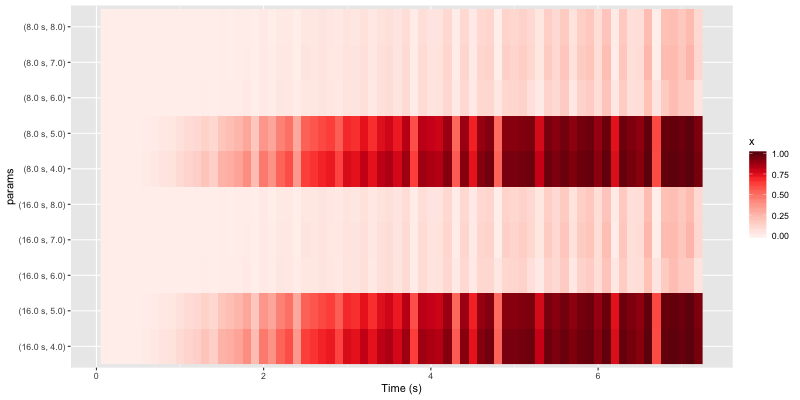

RObject{VecSxp}


In [34]:
rplot(result[3].sources.inweights)

## Delta f = 12st

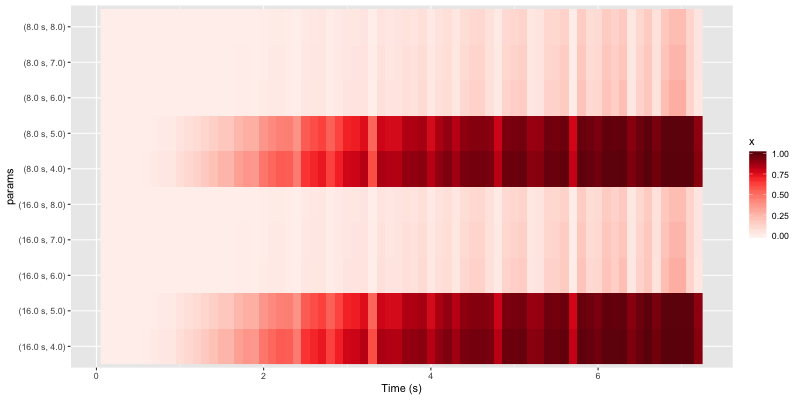

RObject{VecSxp}


In [35]:
rplot(result[4].sources.inweights)

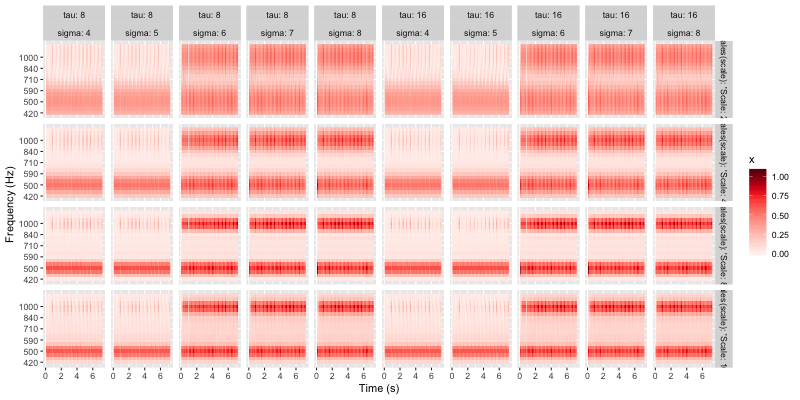

RObject{VecSxp}


In [36]:
rplot(result[4].sources.tracks)

## Examining percepts

In [37]:
result = []
for d in [1,3,6,12]
  params[:Δf] = d
  push!(result,bistable_model(100,params,settings,progressbar=false,
                              intermediate_results=true))
end

┌ Info: 0.21% of frames failed to fully converge to a solution.
└ @ AuditoryBistabilityLE /Users/davidlittle/googledrive/juliadev/AuditoryBistabilityLE/src/nmf.jl:44
┌ Info: 1.46% of frames failed to fully converge to a solution.
└ @ AuditoryBistabilityLE /Users/davidlittle/googledrive/juliadev/AuditoryBistabilityLE/src/nmf.jl:44
┌ Info: 1.67% of frames failed to fully converge to a solution.
└ @ AuditoryBistabilityLE /Users/davidlittle/googledrive/juliadev/AuditoryBistabilityLE/src/nmf.jl:44


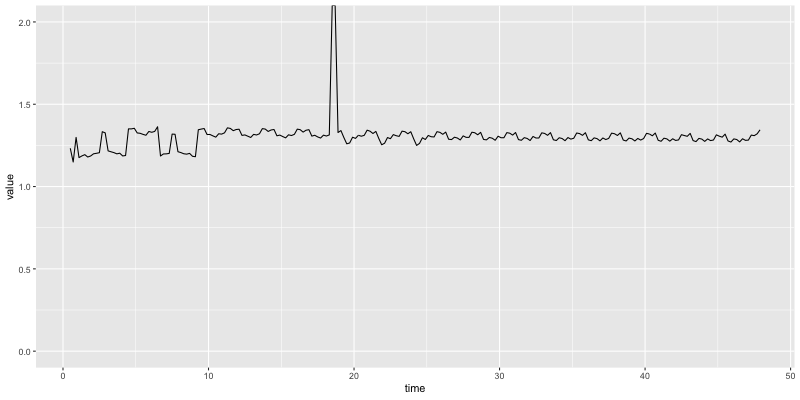

RObject{VecSxp}


In [38]:
p = rplot(result[1].percepts.sratio)
R"$p + ylim(0,2)"

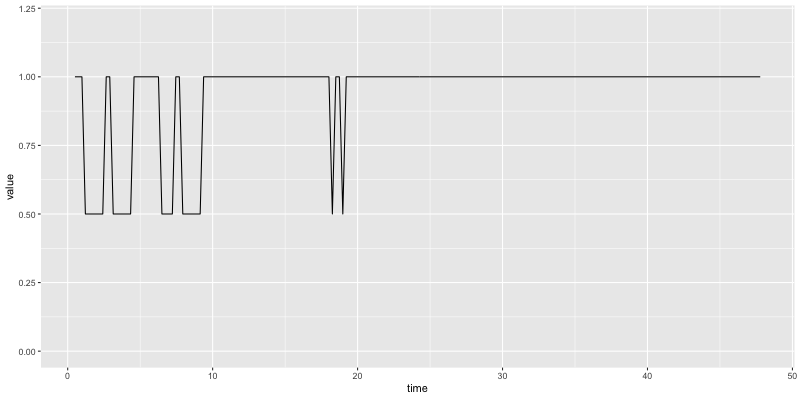

RObject{VecSxp}


In [39]:
p = rplot(result[1].percepts.bratio)
R"$p + ylim(0,1.2)"

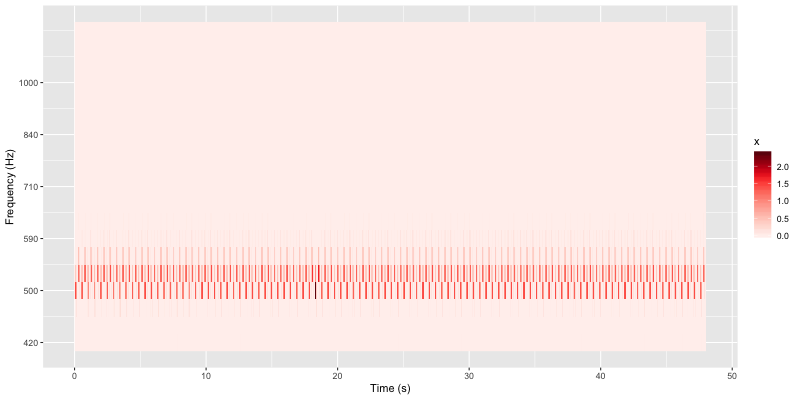

RObject{VecSxp}


In [40]:
rplot(result[1].primary_source)

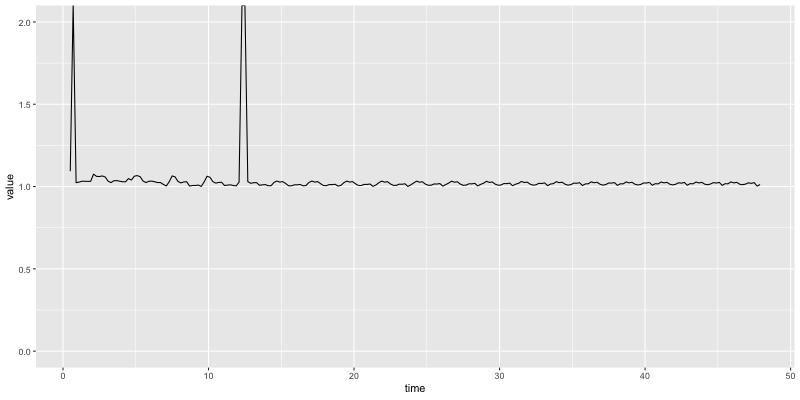

RObject{VecSxp}


In [41]:
p = rplot(result[2].percepts.sratio)
R"$p + ylim(0,2)"

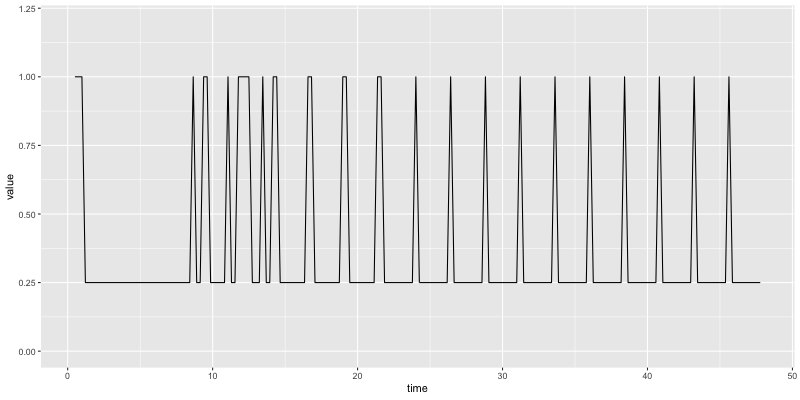

RObject{VecSxp}


In [42]:
p = rplot(result[2].percepts.bratio)
R"$p + ylim(0,1.2)"

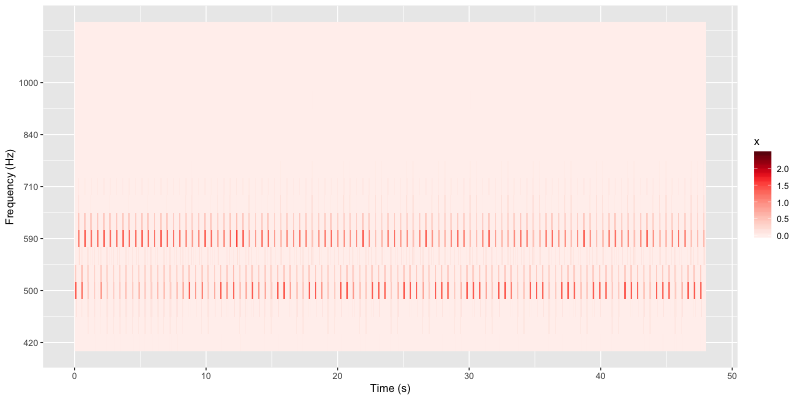

RObject{VecSxp}


In [43]:
rplot(result[2].primary_source)

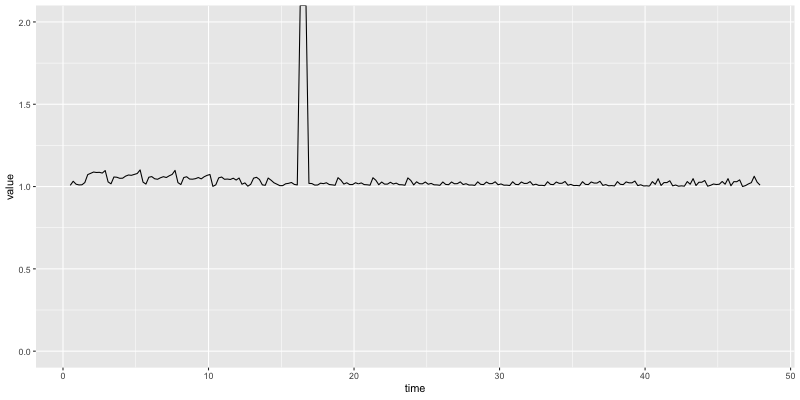

RObject{VecSxp}


In [44]:
p = rplot(result[3].percepts.sratio)
R"$p + ylim(0,2)"

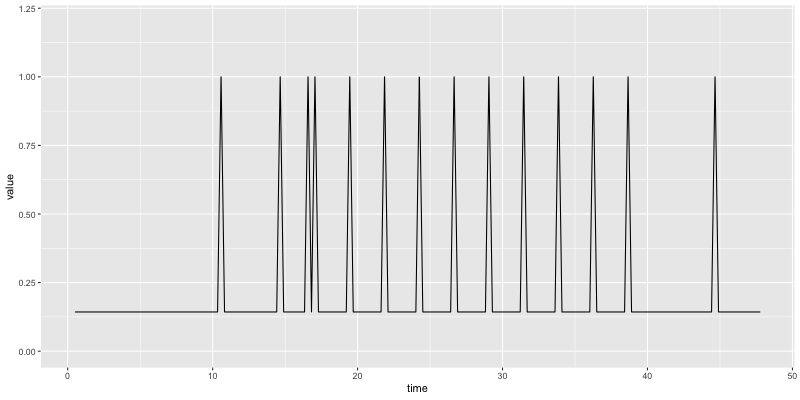

RObject{VecSxp}


In [45]:
p = rplot(result[3].percepts.bratio)
R"$p + ylim(0,1.2)"

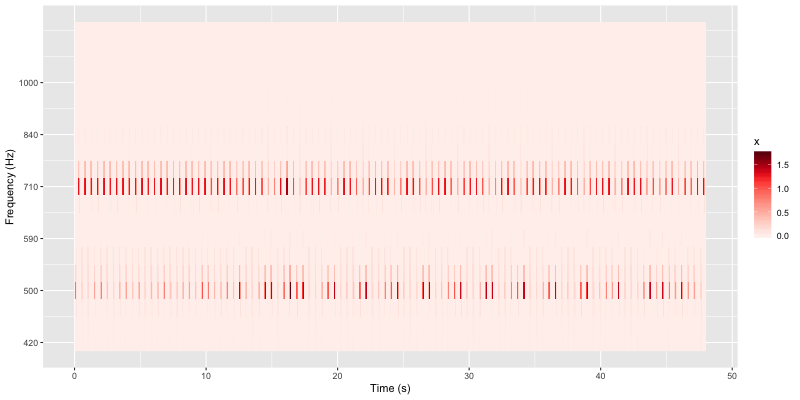

RObject{VecSxp}


In [46]:
rplot(result[3].primary_source)

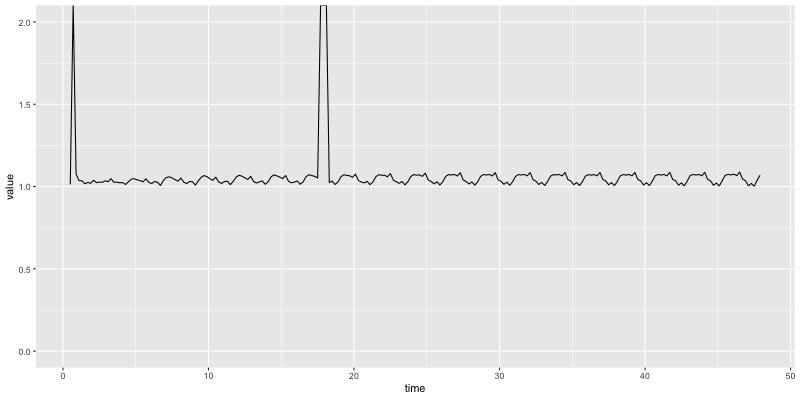

RObject{VecSxp}


In [47]:
p = rplot(result[4].percepts.sratio)
R"$p + ylim(0,2)"

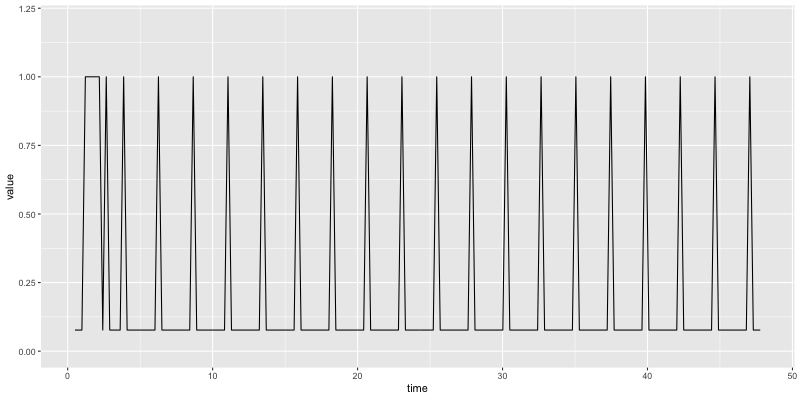

RObject{VecSxp}


In [64]:
p = rplot(result[4].percepts.bratio)
R"$p + ylim(0,1.2)"

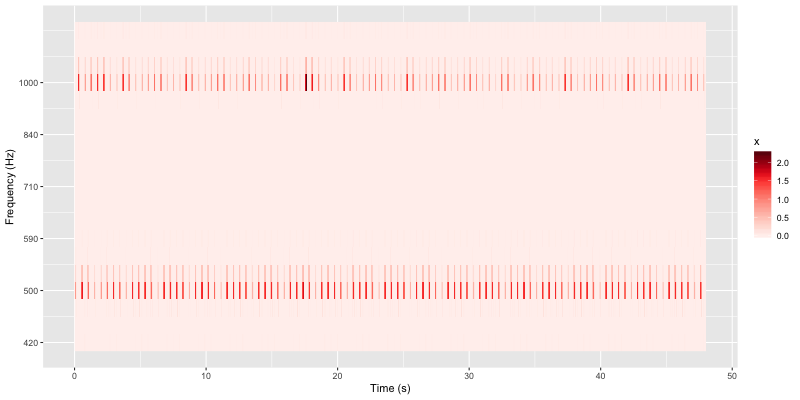

RObject{VecSxp}


In [48]:
rplot(result[4].primary_source)

## Discussion

It appears that normalization didn't work out so well. My guess is that it elminated the differences across deltas. It's not obvious to me why. Two follow-up questions

1. What do these plots look like without the normalization. Is what I'm seeing a consequence of the new bratio? (i.e. where the masks always like this?)
    - having now plotted the results without normalization, it appears that 
      a number of non-sensical outcomes disappear with normalization
      *but* we haven't really fixed the original problem

Seems like there are two approaches:

1. There clearly is some point where things fuse, since that happens at 1st here,
I could change the parameterized scales to move that up somewhat, and hope there is a
reasonable in-between point of bistability
    - in addition this could also just be a matter of changing tau
      it looks like (much with the frequency-level) I would get some bistability in that case.
      
2. It is also possible that I could normalize across scales.... that might help the normalization approach

   - my second run, normalizing within scales, did not seem to help

3. I could work on the neighborhood approach:
   - I need to see if I can futher reduce the frequency resolution
   - Introduce the sparse matrix ridge

# Re-parameterizing scale

In [62]:
settings["track"]["analyze"]["max_sources"] = 2
settings["track"]["analyze"]["normalize"] = true
settings["track"]["analyze"]["min_norm"] = 0.2
settings["scales"]["analyze"]["scales_cycoct"] = [8.0,16.0,32.0]


result = []
for d in [1,3,6,12]
  params[:Δf] = d
  push!(result,bistable_model(15,params,settings,progressbar=false,
                              intermediate_results=true))
end

┌ Info: 5.56% of frames failed to fully converge to a solution.
└ @ AuditoryBistabilityLE /Users/davidlittle/googledrive/juliadev/AuditoryBistabilityLE/src/nmf.jl:44


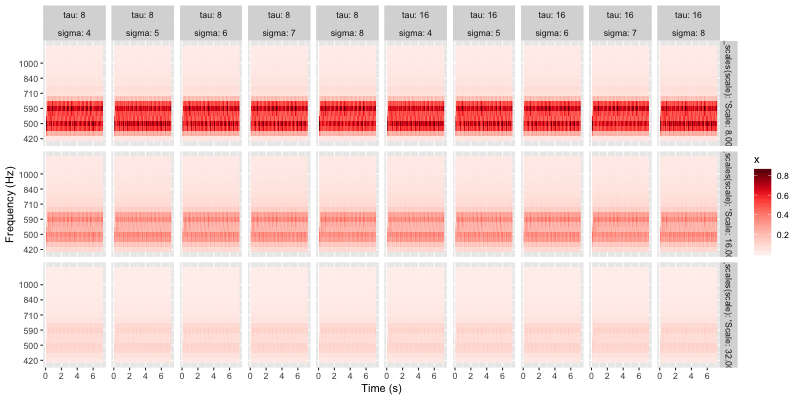

RObject{VecSxp}


In [63]:
rplot(result[2].sources.tracks)

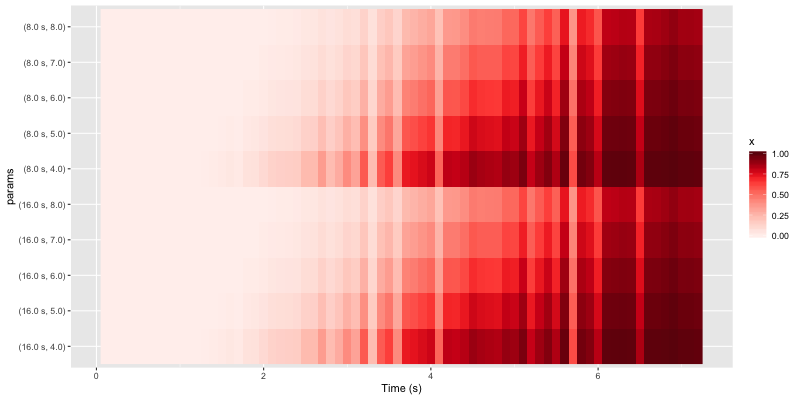

RObject{VecSxp}


In [64]:
rplot(result[2].sources.inweights)

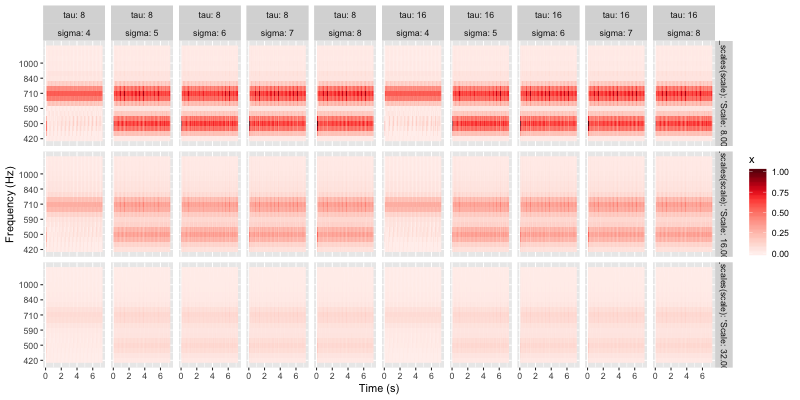

RObject{VecSxp}


In [68]:
rplot(result[3].sources.tracks)

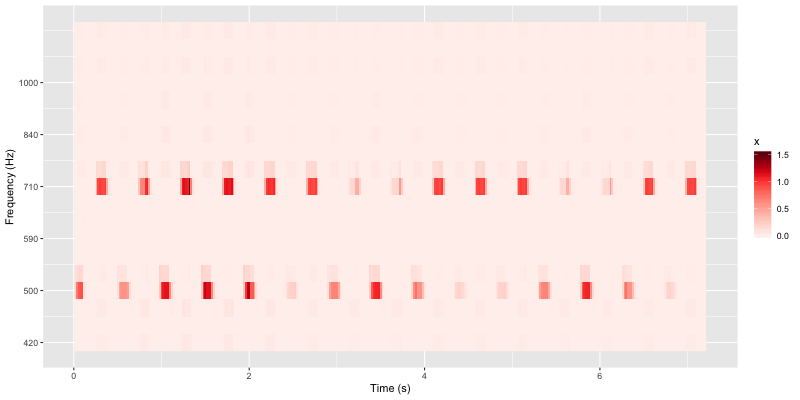

RObject{VecSxp}


In [74]:
rplot(result[3].primary_source)

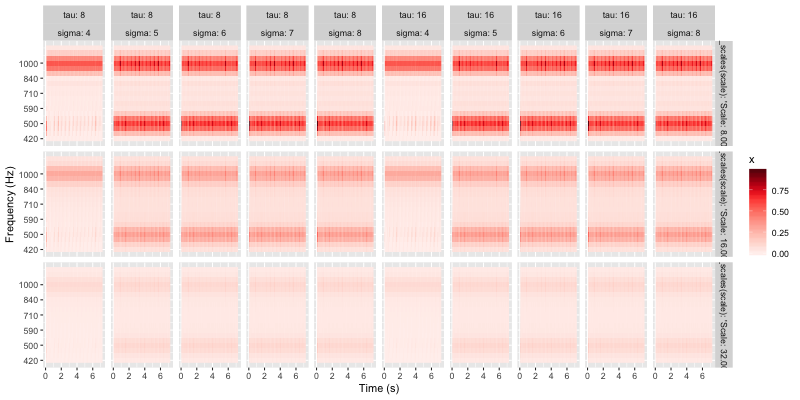

RObject{VecSxp}


In [75]:
rplot(result[4].sources.tracks)

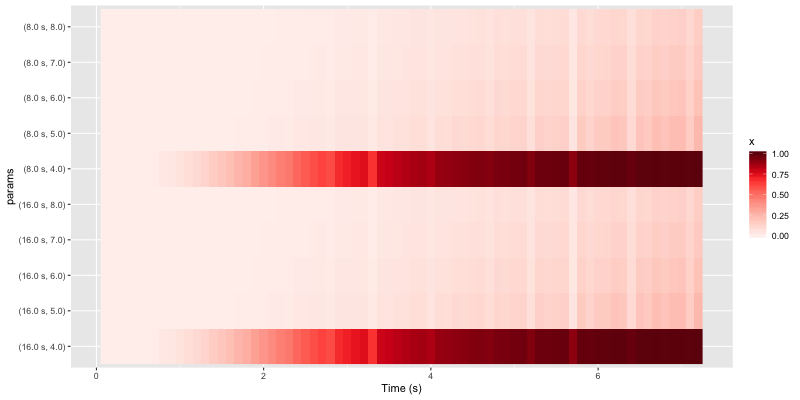

RObject{VecSxp}


In [66]:
rplot(result[4].sources.inweights)

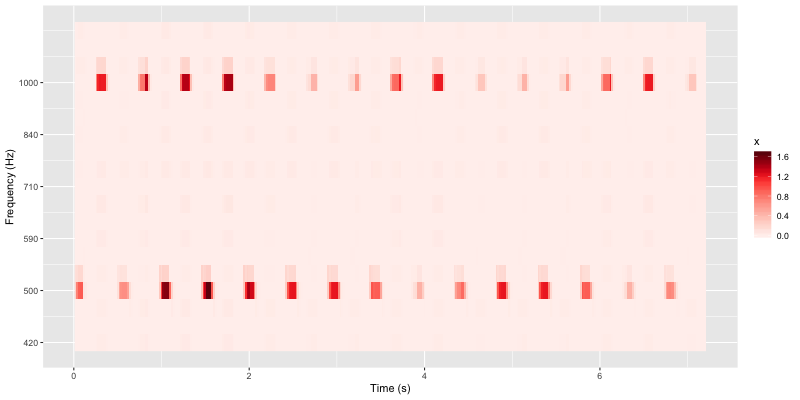

RObject{VecSxp}


In [76]:
rplot(result[4].primary_source)

## Maybe it's working???

In [77]:
settings["track"]["analyze"]["max_sources"] = 2
settings["track"]["analyze"]["normalize"] = true
settings["track"]["analyze"]["min_norm"] = 0.2
settings["scales"]["analyze"]["scales_cycoct"] = [8.0,16.0,32.0]


result = []
for d in [1,3,6,12]
  params[:Δf] = d
  push!(result,bistable_model(100,params,settings,progressbar=false,
                              intermediate_results=true))
end

┌ Info: 6.88% of frames failed to fully converge to a solution.
└ @ AuditoryBistabilityLE /Users/davidlittle/googledrive/juliadev/AuditoryBistabilityLE/src/nmf.jl:44
┌ Info: 0.21% of frames failed to fully converge to a solution.
└ @ AuditoryBistabilityLE /Users/davidlittle/googledrive/juliadev/AuditoryBistabilityLE/src/nmf.jl:44
┌ Info: 0.42% of frames failed to fully converge to a solution.
└ @ AuditoryBistabilityLE /Users/davidlittle/googledrive/juliadev/AuditoryBistabilityLE/src/nmf.jl:44


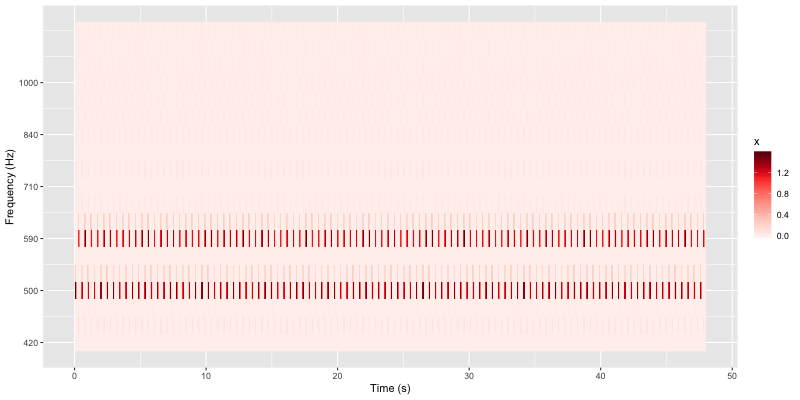

RObject{VecSxp}


In [78]:
rplot(result[2].primary_source)

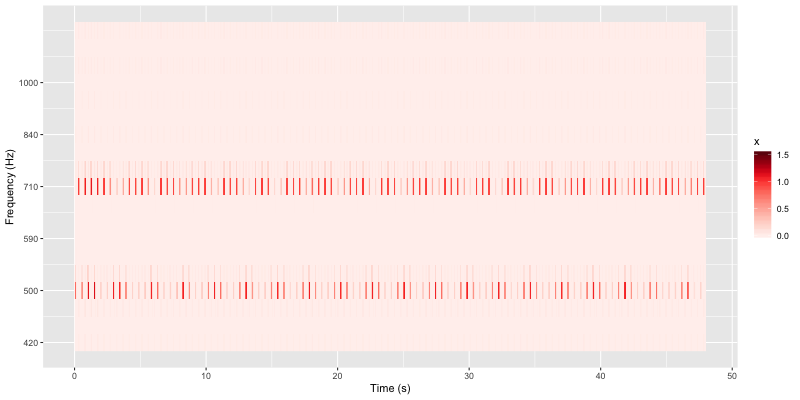

RObject{VecSxp}


In [79]:
rplot(result[3].primary_source)

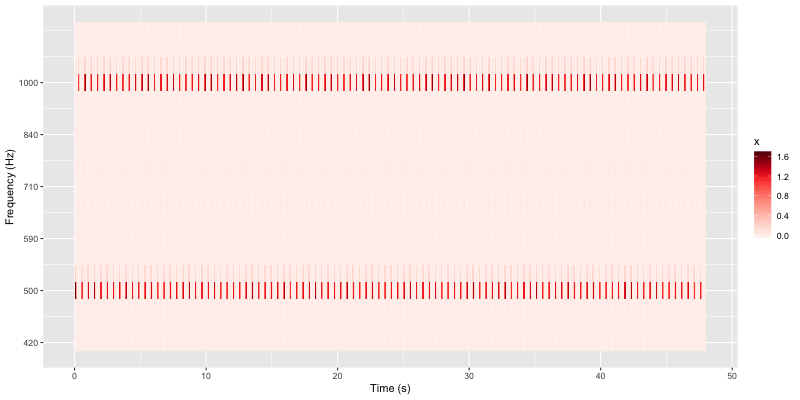

RObject{VecSxp}


In [81]:
rplot(result[4].primary_source)

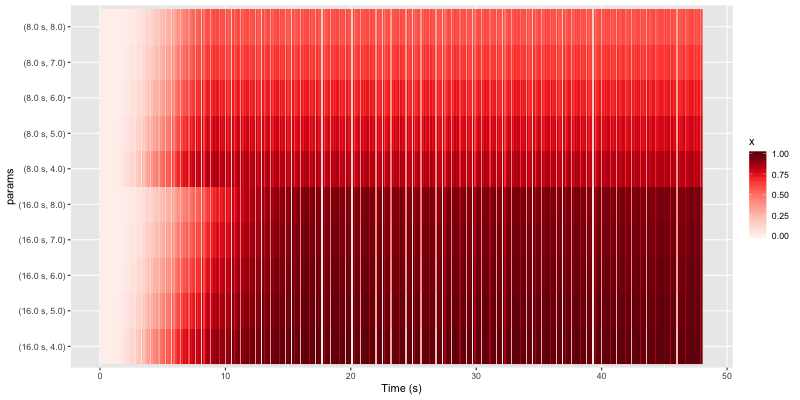

RObject{VecSxp}


In [82]:
rplot(result[4].sources.inweights)

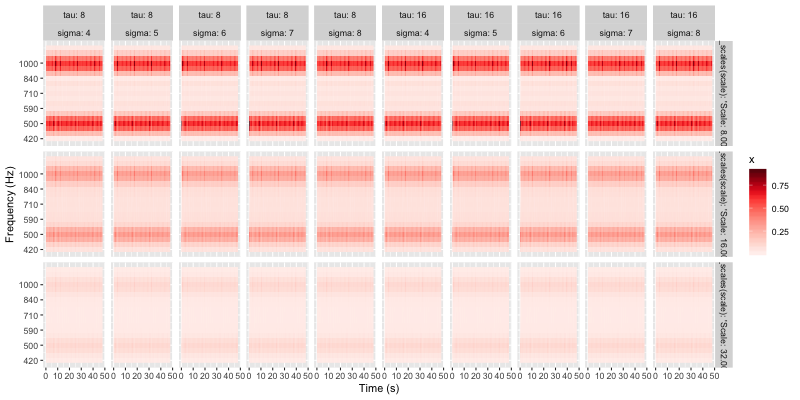

RObject{VecSxp}


In [83]:
rplot(result[4].sources.tracks)

The outcomes seem quite fragile, and it is easy to combine even the largest semitone separation.

I think the key point here is that we really do need a notion of neighborhood for this to work reliably well. It was "working" before, becuase we were using the ratio.